In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('C:\\Users\\Administrator\\Downloads\\Triple Exponential Smoothing  (1).xls',index_col='Date')
print(df)

            Omellette
Date                 
2014-10-01         15
2014-10-02          7
2014-10-03          8
2014-10-04         10
2014-10-05         13
...               ...
2015-01-19         18
2015-01-20         22
2015-01-21         22
2015-01-22         21
2015-01-23         17

[115 rows x 1 columns]


In [3]:
data = df['Omellette']

In [4]:
print(data)

Date
2014-10-01    15
2014-10-02     7
2014-10-03     8
2014-10-04    10
2014-10-05    13
              ..
2015-01-19    18
2015-01-20    22
2015-01-21    22
2015-01-22    21
2015-01-23    17
Name: Omellette, Length: 115, dtype: int64


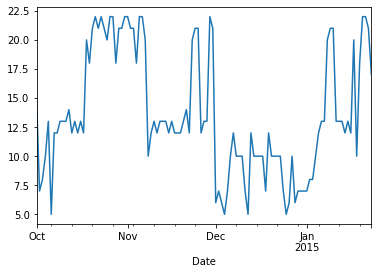

In [5]:
data.plot()

In [12]:
#Simple Moving Average 
df['MA'] = data.rolling(window=40).mean()
df

,Omellette,MA
Date,,
2014-10-01,15,NaN
2014-10-02,7,NaN
2014-10-03,8,NaN
2014-10-04,10,NaN
2014-10-05,13,NaN
...,...,...
2015-01-19,18,10.875
2015-01-20,22,11.250
2015-01-21,22,11.675


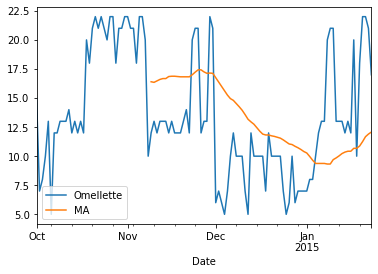

In [13]:
df.plot()


In [14]:
df_omellette = df.dropna()
df_omellette

,Omellette,MA
Date,,
2014-11-09,12,16.400
2014-11-10,13,16.350
2014-11-11,12,16.475
2014-11-12,13,16.600
2014-11-13,13,16.675
...,...,...
2015-01-19,18,10.875
2015-01-20,22,11.250
2015-01-21,22,11.675


In [15]:
# Mean Sqaured Error
from sklearn.metrics import mean_squared_error

In [16]:
error = mean_squared_error(df_omellette['Omellette'],df_omellette['MA'])
error

28.994029605263155

In [17]:
from sklearn.metrics import mean_squared_error
rms_error = np.sqrt(mean_squared_error(df_omellette['Omellette'],df_omellette['MA']))
print("RMS Error is",rms_error)

mse_error = mean_squared_error(df_omellette['Omellette'],df_omellette['MA'])
print('mse error is',mse_error)

Error=np.sum(np.abs(np.subtract(df_omellette['Omellette'],df_omellette['MA'])))
average=np.sum(df_omellette['Omellette'])
MAPE = Error/average
print('MAPE error is',MAPE)

RMS Error is 5.384610441365574
mse error is 28.994029605263155
MAPE error is 0.3776387377584331


In [13]:
# ARMA Model
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

(115,)

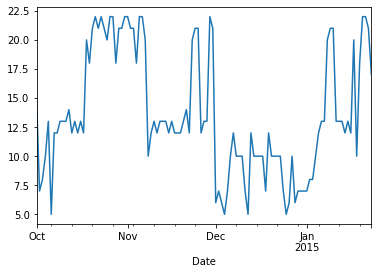

In [14]:
data.plot()
data.shape

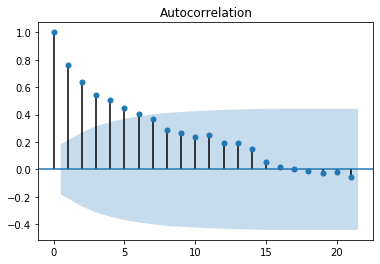

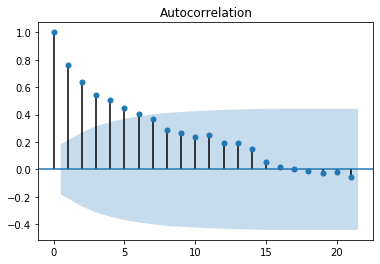

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

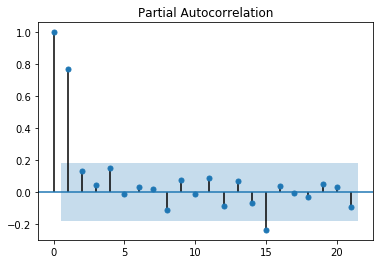

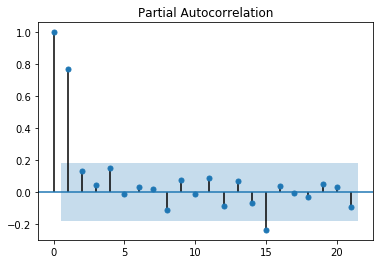

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data)

In [17]:
from statsmodels.tsa.arima_model import ARIMA, ARMAResults

In [18]:
model = ARIMA(data, order = (1,0,1))
results_ARMA = model.fit(disp = 0)

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [19]:
results_ARMA.aic

612.074187406183

In [20]:
print(results_ARMA.summary())

                              ARMA Model Results                              
Dep. Variable:              Omellette   No. Observations:                  115
Model:                     ARMA(1, 1)   Log Likelihood                -302.037
Method:                       css-mle   S.D. of innovations              3.332
Date:                Sun, 13 Sep 2020   AIC                            612.074
Time:                        20:08:48   BIC                            623.054
Sample:                    10-01-2014   HQIC                           616.531
                         - 01-23-2015                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              13.7654      1.548      8.891      0.000      10.731      16.800
ar.L1.Omellette     0.8516      0.067     12.674      0.000       0.720       0.983
ma.L1.Omellette    -0.2269      

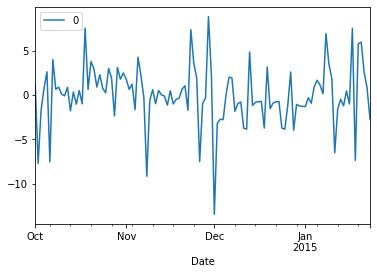

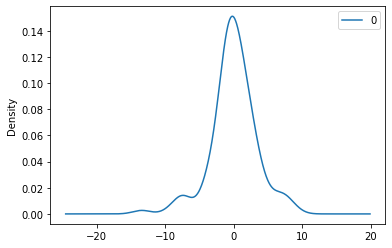

                0
count  115.000000
mean     0.003296
std      3.349770
min    -13.421875
25%     -1.197996
50%      0.003457
75%      1.825801
max      8.810982


In [21]:
#plot residuals
from pandas import DataFrame
residuals = DataFrame(results_ARMA.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

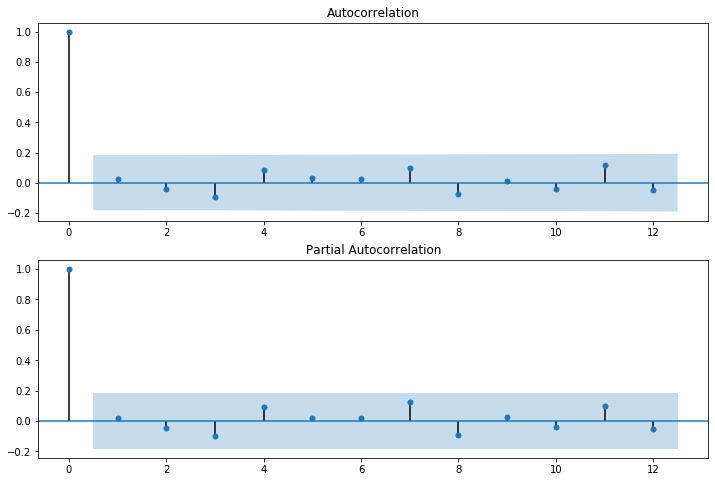

In [22]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residuals.values.squeeze(), lags=12, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residuals, lags=12, ax=ax2)

In [23]:
sm.stats.durbin_watson(results_ARMA.resid.values)

1.9484797167216297

In [24]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [81]:
#LJung Box Test
acorr_ljungbox(residuals, lags = 12)

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([0.05826174, 0.26391889, 1.36740786, 2.26203665, 2.35937782,
        2.42405446, 3.60090328, 4.27592308, 4.28737946, 4.53126611,
        6.38048944, 6.69943517]),
 array([0.80926472, 0.87637654, 0.71319197, 0.68768914, 0.7975078 ,
        0.87686848, 0.82442524, 0.83141017, 0.89150057, 0.92021567,
        0.84680971, 0.87682036]))

In [25]:
# Forecasting 
ARMA_forecast = results_ARMA.forecast(steps = 115)[0]
ARMA_forecast

array([17.14244757, 16.64117068, 16.21430107, 15.85079407, 15.54124441,
       15.2776429 , 15.05316922, 14.8620154 , 14.69923559, 14.56061808,
       14.44257633, 14.34205617, 14.25645677, 14.18356336, 14.12148991,
       14.06863037, 14.02361706, 13.98528533, 13.95264338, 13.92484666,
       13.90117596, 13.88101883, 13.86385373, 13.84923655, 13.83678907,
       13.82618924, 13.8171628 , 13.80947621, 13.80293058, 13.79735655,
       13.79260991, 13.78856783, 13.78512575, 13.78219459, 13.77969852,
       13.77757295, 13.7757629 , 13.77422152, 13.77290894, 13.77179119,
       13.77083935, 13.7700288 , 13.76933856, 13.76875078, 13.76825025,
       13.76782402, 13.76746105, 13.76715196, 13.76688875, 13.76666461,
       13.76647374, 13.7663112 , 13.76617279, 13.76605492, 13.76595455,
       13.76586908, 13.76579629, 13.76573431, 13.76568153, 13.76563658,
       13.76559831, 13.76556572, 13.76553796, 13.76551433, 13.7654942 ,
       13.76547706, 13.76546246, 13.76545003, 13.76543945, 13.76

In [26]:
from sklearn.metrics import mean_squared_error
rms_error = np.sqrt(mean_squared_error(data,ARMA_forecast))
print("RMS Error is",rms_error)

mse_error = mean_squared_error(data,ARMA_forecast)
print('mse error is',mse_error)

Error=np.sum(np.abs(np.subtract(data,ARMA_forecast)))
average=np.sum(data)
MAPE = Error/average
print('MAPE error is',MAPE)

RMS Error is 5.360099312707581
mse error is 28.730664642088275
MAPE error is 0.33576105775359566


In [18]:
# Exponential Smoothing
train_df = df.iloc[:92]
test_df = df.iloc[92:]

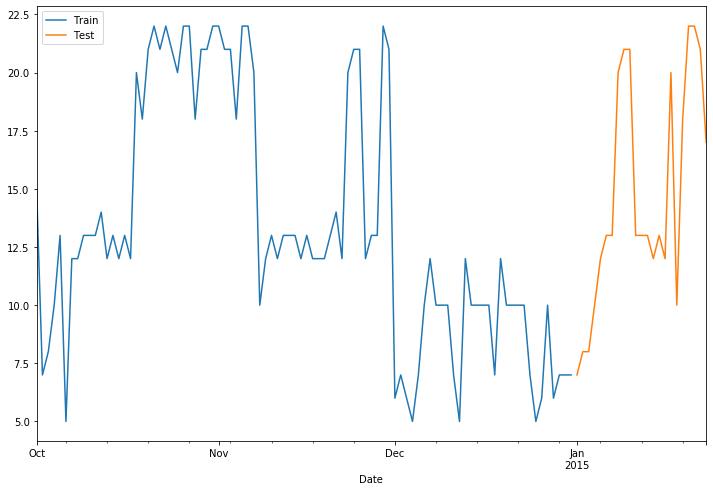

In [19]:
train_df['Omellette'].plot(legend = True,label='Train')
test_df['Omellette'].plot(legend = True,label='Test',figsize=(12,8))

In [20]:
#Simple Exponential Smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span = 3
alpha = 2/(span+1)
model = SimpleExpSmoothing(train_df['Omellette']).fit(smoothing_level = alpha)
test_predictions = model.forecast(23).rename('SES Forecast')

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


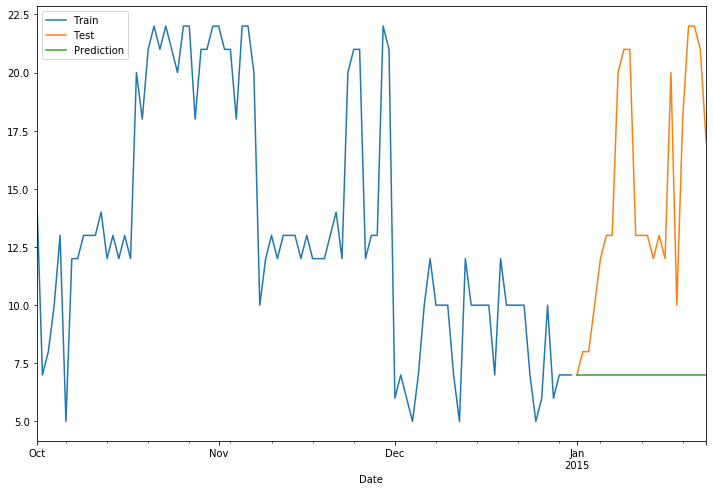

In [21]:
train_df['Omellette'].plot(legend= True,label='Train')
test_df['Omellette'].plot(legend=True,label='Test',figsize=(12,8))
test_predictions.plot(legend=True,label='Prediction')

In [22]:
from sklearn.metrics import mean_squared_error
rms_error = np.sqrt(mean_squared_error(test_df['Omellette'],test_predictions))
print("RMS Error is",rms_error)

mse_error = mean_squared_error(test_df['Omellette'],test_predictions)
print('mse error is',mse_error)

Error=np.sum(np.abs(np.subtract(test_df['Omellette'],test_predictions)))
average=np.sum(test_df['Omellette'])
MAPE = Error/average
print('MAPE error is',MAPE)

RMS Error is 9.09804190983337
mse error is 82.77436659308444
MAPE error is 0.5243441721253089


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


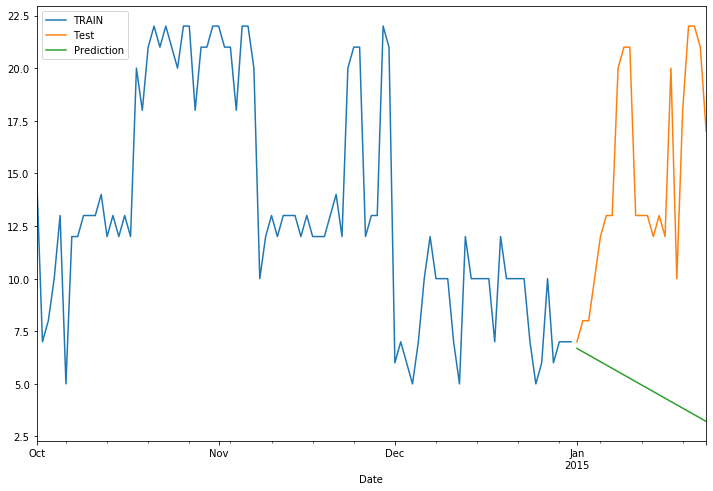

In [23]:
# Double Exponential Smoothing
from statsmodels.tsa.holtwinters import Holt
span = 3
alpha = 2/(span+1)
beta = 0.05
model = Holt(train_df['Omellette']).fit(smoothing_level=alpha,smoothing_slope=beta)
test_predictions1=model.forecast(23).rename('DES Forecast')

train_df['Omellette'].plot(legend=True,label='TRAIN')
test_df['Omellette'].plot(legend=True,label='Test',figsize=(12,8))
test_predictions1.plot(legend=True,label='Prediction')

In [24]:
from sklearn.metrics import mean_squared_error
rms_error = np.sqrt(mean_squared_error(test_df['Omellette'],test_predictions1))
print("RMS Error is",rms_error)

mse_error = mean_squared_error(test_df['Omellette'],test_predictions1)
print('mse error is',mse_error)

Error=np.sum(np.abs(np.subtract(test_df['Omellette'],test_predictions1)))
average=np.sum(test_df['Omellette'])
MAPE = Error/average
print('MAPE error is',MAPE)

RMS Error is 11.229705805115161
mse error is 126.10629246943714
MAPE error is 0.6641368614741594


In [46]:
#Triple Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
triple_model = ExponentialSmoothing(train_df['Omellette'],trend='add',seasonal='add',seasonal_periods=30).fit()
test_predictions2=triple_model.forecast(23).rename('TES FORECAST')

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


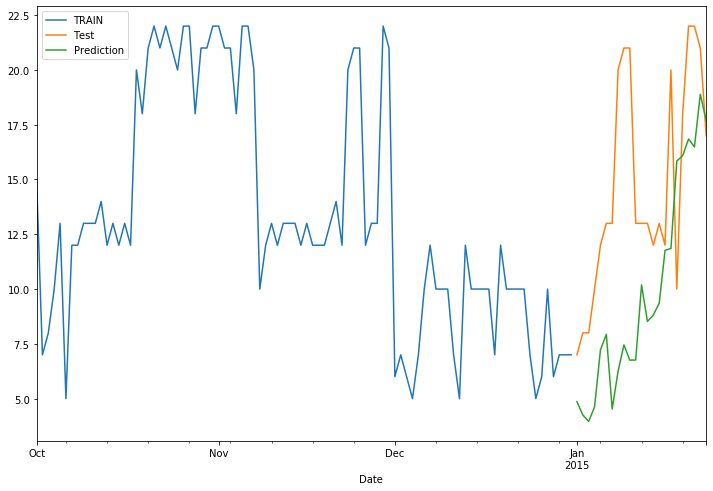

In [47]:
train_df['Omellette'].plot(legend=True,label='TRAIN')
test_df['Omellette'].plot(legend=True,label='Test',figsize=(12,8))
test_predictions2.plot(legend=True,label='Prediction')

In [48]:
from sklearn.metrics import mean_squared_error
rms_error = np.sqrt(mean_squared_error(test_df['Omellette'],test_predictions2))
print("RMS Error is",rms_error)

mse_error = mean_squared_error(test_df['Omellette'],test_predictions2)
print('mse error is',mse_error)

Error=np.sum(np.abs(np.subtract(test_df['Omellette'],test_predictions2)))
average=np.sum(test_df['Omellette'])
MAPE = Error/average
print('MAPE error is',MAPE)

RMS Error is 6.646993716829036
mse error is 44.18252547156468
MAPE error is 0.3691208173522393
